## Autoregressive Process

The pth-order autoregressive process, denoted by $AR(p)$, is defined as

\begin{align}
Y_t=\phi_1 Y_{t-1}+\phi_2 Y_{t-2}+\cdots+\phi_p Y_{t-p}+e_t
\end{align}

where $e_t$ is a white noise process with mean zero and variance $\sigma^2$. 

Note that we assume that $Y_{t}$ has zero mean. If $Y_{t}$ has a non-zero mean, we can subtract the mean from $Y_{t}$ and then apply the AR(p) model to the de-meaned series.

The AR(p) process has the following characteristic polynomial:

\begin{align}
\phi(x)=1-\phi_1 x-\phi_2 x^2-\cdots-\phi_p x^p
\end{align}

which corresponds to the following characteristic equation:

\begin{align}
1-\phi_1 x-\phi_2 x^2-\cdots-\phi_p x^p=0
\end{align}

---

### Stationarity of AR(p) Process

Assuming that $e_t$ is independent of $Y_{t-1}, Y_{t-2}, Y_{t-3}, \ldots, Y_{t-p}$, a stationary solution to the characteristic equation exists **if and only if** the $p$ roots of the AR characteristic equation each exceed 1 in absolute value (modulus). The following two inequalities are necessary for stationarity:

$$
\left.\begin{array}{c}
\phi_1+\phi_2+\cdots+\phi_p<1 \\
\text { and } \quad\left|\phi_p\right|<1
\end{array}\right\}
$$

---

### Autocorrelation Function (ACF) of AR(p) Process

Assuming stationarity and zero means, we can multiple both sides of the AR(p) process by $Y_{t-k}$, take expectations, and divide by the variance of $Y_t$:

\begin{align}
\rho_{k}=\phi_{1} \rho_{k-1}+\phi_{2} \rho_{k-2}+\cdots+\phi_{p} \rho_{k-p} \quad \text { for } k=1,2, \ldots, p
\end{align}

where $\rho_k$ is the autocorrelation function (ACF) at lag $k$. 

Substituting $k=1,2,\ldots,p$ into the above equation and using $\rho_{0}=1$ and $\rho_{-k}=\rho_{k}$:

\begin{align}
\begin{bmatrix}
\rho_1 \\
\rho_2 \\
\rho_3 \\
\vdots \\
\rho_p
\end{bmatrix}
=
\begin{bmatrix}
1 & \rho_1 & \rho_2 & \cdots \\
\rho_1 & 1 & \rho_1 & \cdots \\
\rho_2 & \rho_1 & 1 & \cdots \\
\vdots & \vdots & \vdots & \ddots \\
\rho_{p-1} & \rho_{p-2} & \rho_{p-3} & \cdots
\end{bmatrix}
\begin{bmatrix}
\phi_1 \\
\phi_2 \\
\phi_3 \\
\vdots \\
\phi_p
\end{bmatrix}
\end{align}

Given values for $\phi_1, \phi_2, \ldots, \phi_p$, we can solve the above system of equations to find the ACF values $\rho_1, \rho_2, \ldots, \rho_p$.

---

### Special Cases of AR(1) Process

For an $AR(1)$ process:

- when $\phi_1=0$ and $\mu=0, y_t$ is equivalent to white noise

    \begin{align*}
    Y_t=\mu+\phi_1 Y_{t-1}+e_t=0+0+e_t=e_t
    \end{align*}

- when $\phi_1=1$ and $\mu=0, y_t$ is equivalent to a random walk

    \begin{align*}
    Y_t=\mu+\phi_1 Y_{t-1}+e_t=0+Y_{t-1}+e_t=Y_{t-1}+e_t
    \end{align*}
    
- when $\phi_1=1$ and $\mu \neq 0, y_t$ is equivalent to a random walk with drift

    \begin{align*}
    Y_t=\mu+\phi_1 Y_{t-1}+e_t=\mu+Y_{t-1}+e_t=\mu+Y_{t-1}+e_t
    \end{align*}

- when $\phi_1<0, y_t$ tends to oscillate around the mean

In [11]:
from typing import List

import numpy as np

from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf


In [4]:
def simulate_ar_process(mean: int, variance: int, p: int, n: int, phis: List[int]) -> np.ndarray:
    """
    Simulate an autoregressive process of order p.

    Parameters
    ----------
    mean : int
        The mean of the white noise, e_i.
    variance : int
        The variance of the white noise, e_i.
    p : int
        The order of the autoregressive process.
    n : int
        The number of observations to simulate.
    phis : List[int]
        The parameters of the autoregressive process, phi_1, ..., phi_p.

    Returns
    -------
    np.ndarray
        An array of shape (n,) containing the simulated autoregressive process, Y_t.
    """
    # Generate white noise, e_t, with the given mean and variance
    e_t = np.random.normal(mean, np.sqrt(variance), size=n)
    
    # Initialize array for the autoregressive process
    y_t = np.zeros(n)
    
    # Iterate over each time point and compute the autoregressive process using past values
    for t in range(p, n):
            y_t[t] = sum(phis[j] * y_t[t - j - 1] for j in range(p)) + e_t[t]
    
    return y_t


### AR(1) Process

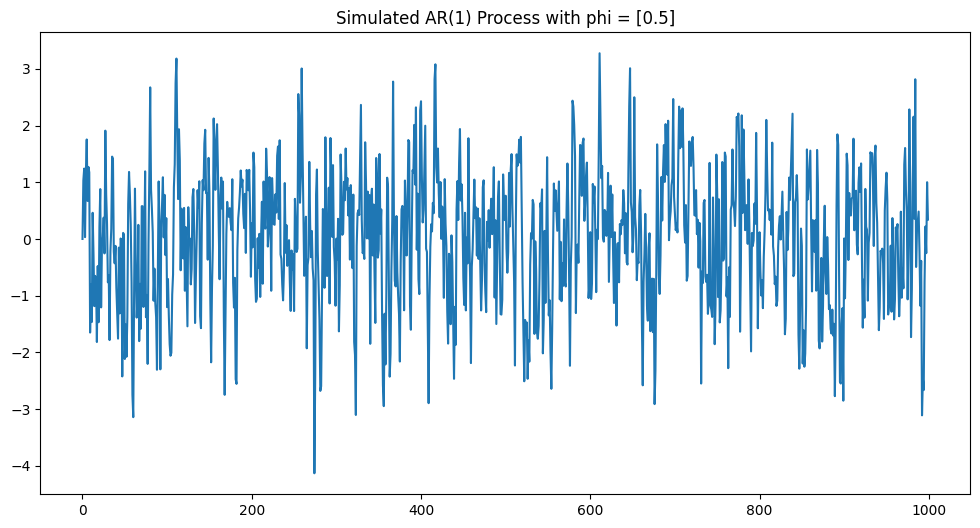

In [7]:
phis = [0.5]

y_t_ar_1 = simulate_ar_process(mean=0, variance=1, p=1, n=1000, phis=phis)

plt.figure(figsize=(12, 6))
plt.plot(y_t_ar_1)
plt.title(f"Simulated AR(1) Process with phi = {phis}")
plt.show();


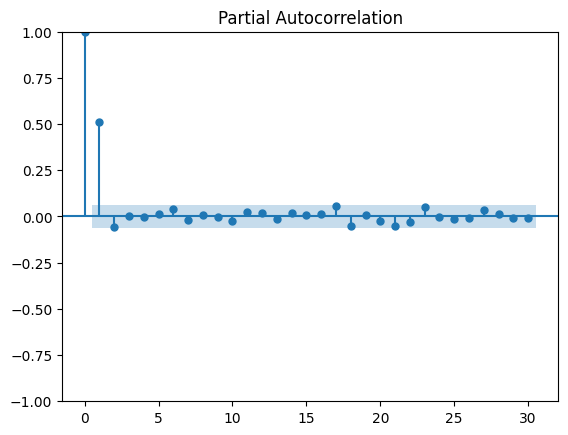

In [12]:
plot_pacf(y_t_ar_1);


### AR(2) Process

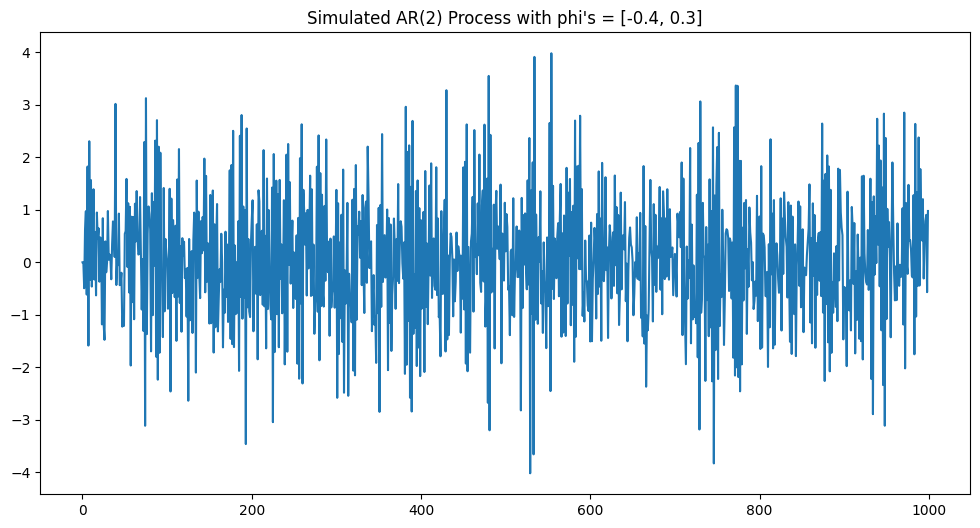

In [13]:
# Subject to |phi| < 1 and phi_1 + phi_2 < 1
phis = [-0.4, 0.3]

y_t_ar_2 = simulate_ar_process(mean=0, variance=1, p=2, n=1000, phis=phis)

plt.figure(figsize=(12, 6))
plt.plot(y_t_ar_2)
plt.title(f"Simulated AR(2) Process with phi's = {phis}")
plt.show();


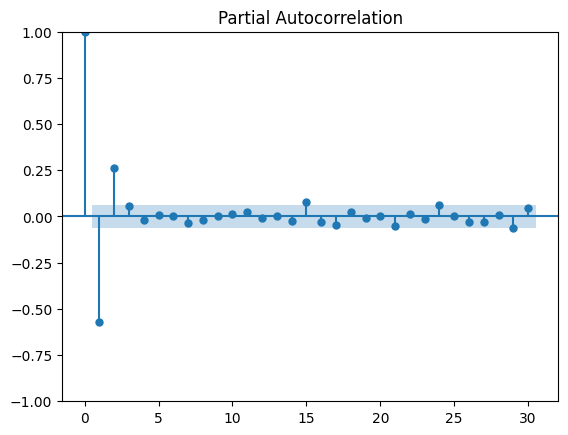

In [14]:
plot_pacf(y_t_ar_2);


### AR(3) Process

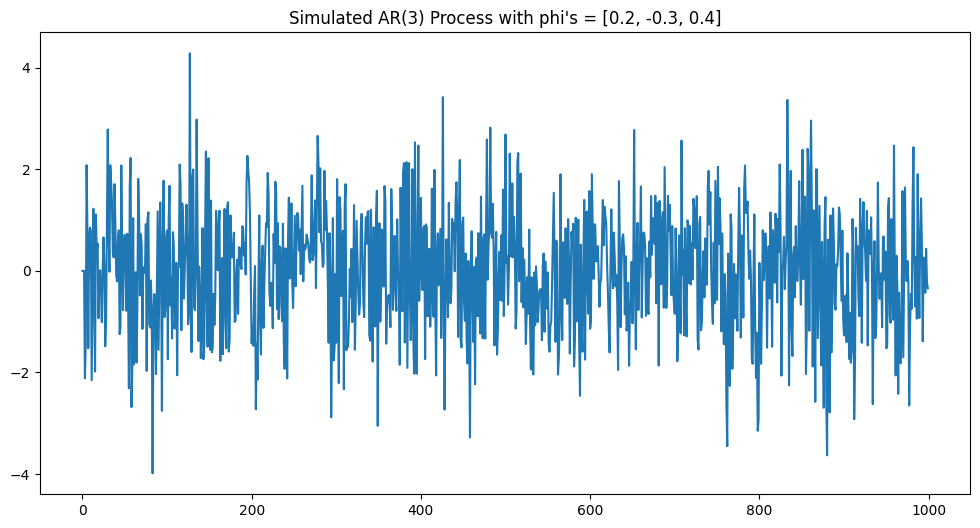

In [17]:
# Subject to |phi| < 1 and phi_1 + phi_2 + phi_3 < 1
phis = [0.2, -0.3, 0.4]

y_t_ar_3 = simulate_ar_process(mean=0, variance=1, p=3, n=1000, phis=phis)

plt.figure(figsize=(12, 6))
plt.plot(y_t_ar_3)
plt.title(f"Simulated AR(3) Process with phi's = {phis}")
plt.show();


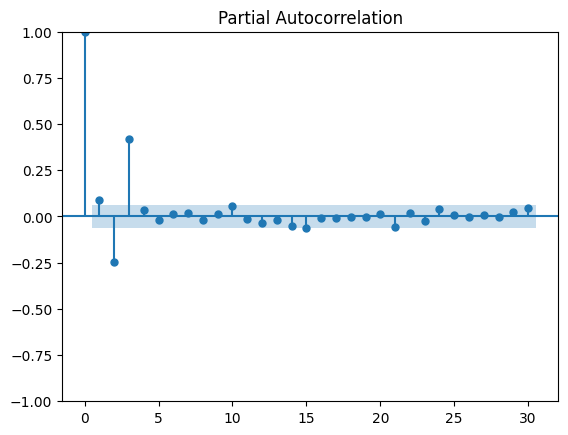

In [18]:
plot_pacf(y_t_ar_3);
